In [53]:
import numpy as np
import seaborn as sns
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report



In [60]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them
#X = data.values[:,2:-1].astype('float64')
#X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 30)


In [62]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print('Scikit-learn LR Accuracy All Features: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')

print("Scikit-learn LR All Features Report:")
Y_pred = logreg.predict(X_test)
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, Y_pred, target_names=target_names))

Scikit-learn LR Accuracy All Features: 95.10 %
Scikit-learn LR All Features Report:
             precision    recall  f1-score   support

     Benign       0.93      1.00      0.96        90
  Malignant       1.00      0.87      0.93        53

avg / total       0.95      0.95      0.95       143



In [63]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

def Hypothesis(theta, X):   
    return Sigmoid(X @ theta) #@ symbol is a decorator to do matrix multiplication and part of python 3.5 only 

In [64]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, X)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [65]:
def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Derivative(X,Y,theta,m,alpha)
    return new_theta

LR Accuracy all features:  97.2027972028 %
Sckit-learn Accuracy score 97.202797 %
Coefficients (thetas):
(Largest coefficients to be collected in excel)
[[  5.69306754e-03]
 [  7.60650814e-03]
 [  4.73130455e+00]
 [ -3.15530027e+01]
 [  5.23951004e+00]
 [ -1.17851009e+01]
 [  1.95680772e+00]
 [  2.10819968e+01]
 [  3.00238170e+01]
 [ -1.78193220e+00]
 [ -1.56389864e+01]
 [  2.20798789e+01]
 [ -6.83081770e+00]
 [  1.57871753e+01]
 [  2.49828233e+01]
 [ -1.03782952e+01]
 [ -1.16380975e+01]
 [ -1.03288226e+01]
 [ -5.63663294e+00]
 [ -8.67976366e+00]
 [ -4.56646536e+00]
 [ -7.01936500e+00]
 [  4.11368393e+00]
 [ -3.51520138e+00]
 [  2.49687336e+01]
 [  5.90046151e+00]
 [  2.25023190e+00]
 [  2.56916306e+00]
 [  1.84343857e+00]
 [  1.00603552e+01]]


Plot of LR Coefficients (thetas):


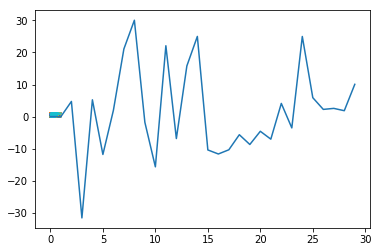

In [66]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy all features: ', my_accuracy, "%")
    print("Sckit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)
    print("Coefficients (thetas):")
    print("(Largest coefficients to be collected in excel)")
    theta.sort()
    print(theta)
    x = np.linspace(-10, 30, 50)
    y = -(theta[0] + theta[1]*x)/theta[2]
    print("\n")
    print("Plot of LR Coefficients (thetas):")
    plt.plot(X, Y)
    plt.plot(theta)
    plt.show()



ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

Confusion Matrix: 
 [[88  2]
 [ 2 51]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.98      0.98      0.98        90
  Malignant       0.96      0.96      0.96        53

avg / total       0.97      0.97      0.97       143

Sckit-learn Accuracy score 97.202797 %


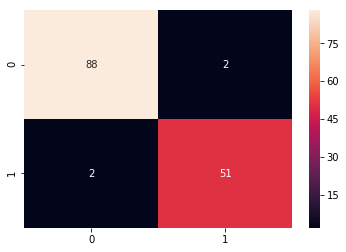

In [67]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))
    print("Sckit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)
